In [4]:
pip install calplot

In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style= 'darkgrid')
from collections import Counter
import calplot


In [ ]:
# My Streaming History 

In [ ]:
# In this section, I gonna  analyse my behaviour and personality with the help of my music listening history.
# I started using spotify in 2019 and since then I'm on it as a result i have generated huge  2 years data
# which will be enough for my analysis.

In [2]:
 cd E:\DATA SCIENCE PROJECT\MY SPOTIFY DATA ANALYSIS\DATA

E:\DATA SCIENCE PROJECT\MY SPOTIFY DATA ANALYSIS\DATA


In [ ]:
# I'll  create a visualization in which I'll know for how long i used to listen to the music. 
# This plot is kinda simmilar like the github plot which shows are commits
# but here I gonna be showing the amount time (in minutes) I listened to music.

In [3]:
# reading the dataset in dataframe
my_streaming = pd.read_csv('song_data.csv')
my_streaming = my_streaming.drop(columns=['Unnamed: 0'])
my_streaming.head(3)

,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature
0,Halsey,Gasoline,199593,2020-05-12 08:49:00,0.731,0.580,10.0,-7.328,0.0,0.0399,0.2230,0.0,0.1290,0.319,119.997,2IO7yf562c1zLzpanal1DT,4.0
1,Dua Lipa,IDGAF,150004,2020-05-24 15:36:00,0.836,0.544,7.0,-5.975,1.0,0.0943,0.0403,0.0,0.0824,0.510,97.028,76cy1WJvNGJTj78UqeA5zr,4.0
2,Dua Lipa,IDGAF,213981,2020-05-28 09:21:00,0.836,0.544,7.0,-5.975,1.0,0.0943,0.0403,0.0,0.0824,0.510,97.028,76cy1WJvNGJTj78UqeA5zr,4.0


In [4]:
# converting ms to minute and extracting date from datetime column
my_streaming['mins_played'] = my_streaming.apply(lambda x: round(x['msPlayed']/60000,2), axis=1)
my_streaming['date'] = my_streaming.apply(lambda x: pd.to_datetime(x['datetime'][:10],format='%Y-%m-%d'),axis=1)

In [5]:
# calculate the daily streaming time length 
daily_length = my_streaming.groupby('date',as_index=True).sum()

In [6]:
# create new date series to  display time series data
idx = pd.DataFrame(pd.date_range(min(my_streaming.date), max(my_streaming.date)),columns=['date'])
idx['date'] = idx.apply(lambda x: pd.to_datetime(x['date'],format='%Y-%m-%d'),axis=1)

# use new date series to display the daily streaming time
new_daily_length = pd.merge(idx, daily_length, how='left', left_on='date', right_on = 'date', copy=False)
new_daily_length.head()

,date,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mins_played
0,2020-05-12,199593.0,0.731,0.58,10.0,-7.328,0.0,0.0399,0.223,0.0,0.129,0.319,119.997,4.0,3.33
1,2020-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-05-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Dropping the all columns except the Date and Time 
new_daily_length = new_daily_length.drop(new_daily_length.loc[:, 'msPlayed':'time_signature'], axis=1)

In [8]:
# Let's set the date as index
new_daily_length.index = new_daily_length.date

new_daily_length = new_daily_length.drop(columns=['date'])
new_daily_length.head()

,mins_played
date,
2020-05-12,3.33
2020-05-13,NaN
2020-05-14,NaN
2020-05-15,NaN
2020-05-16,NaN


In [9]:
# converting the dataframe into series for calplot
new_daily_length = new_daily_length.squeeze()

In [11]:
# calplot.calplot(new_daily_length, figsize=(20,10), suptitle=' Streaming History', cmap='Spectral' )

In [12]:
# According to the Graph I used to listen to the music while i used to travel to the college on bike
#Everyday on average i used to listen to the music 5 to 80 min. However, there were days when I listened to music
# for more than 100 mins as well.
# Morover, many days I never listened to music as well, this is probably because, I maybe in the rush of the submission 
# And i didn't get the time.
#And since April 2020 lockdown was imposed, and at home I listened for less amount of time (may be less than 30 minutes).
# However, there were a few days when I would listen for more than an hour.

In [13]:
#Now we'l see whihc artist did i listend the most?

In [11]:
# grouping the dataset as per artist name and counting the songs per artist
artist_length = my_streaming.groupby('artistName',as_index=False).sum()
artist_song_cnt = my_streaming.groupby('artistName',as_index=False).agg({"trackName": "nunique"})

In [12]:
# merge artist_length and artist_song_cnt 
artist_length_uniqsong = pd.merge(artist_length,artist_song_cnt,how='left',on='artistName',copy=False)
artist_length_uniqsong.rename(columns={'trackName':'unique_track_number'},inplace=True)
artist_length_uniqsong.head(3)

,artistName,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mins_played,unique_track_number
0,$teev,61156,0.378,0.709,1.0,-7.558,1.0,0.0882,0.01730,0.000002,0.3840,0.2280,80.500,4.0,1.02,1
1,2 Chainz,227893,0.563,0.902,1.0,-4.586,0.0,0.4020,0.05450,0.000000,0.0524,0.5590,171.999,4.0,3.80,1
2,3LAU,2353786,8.947,11.333,60.0,-65.255,15.0,1.2305,0.40986,0.053558,4.7718,7.0315,1564.332,59.0,39.25,5


In [13]:
max_time  = artist_length_uniqsong.sort_values(by=['mins_played'])
max_time.tail()

,artistName,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mins_played,unique_track_number
769,Zedd,36980558,142.718,142.357,1123.0,-794.232,193.0,9.7660,47.237750,0.000418,25.5293,86.4490,24458.129,814.0,616.26,15
681,The Chainsmokers,37937587,123.355,117.882,1016.0,-1152.067,144.0,7.5792,43.726244,0.076389,32.6354,97.8750,19886.168,760.0,632.18,14
283,Halsey,41859486,135.071,157.830,877.0,-1155.265,140.0,13.1778,40.679300,0.499969,36.2665,104.2430,25611.461,886.0,697.72,12
151,DEAMN,44389184,152.959,175.981,1138.0,-1363.221,199.0,18.6557,37.699226,3.720381,47.0514,103.4073,30416.155,1003.0,739.81,25
332,Jason Derulo,49849044,202.351,206.192,1317.0,-1410.928,164.0,44.4023,37.271080,0.158853,44.4931,183.1010,30277.298,1124.0,830.91,21


In [14]:
# top 30 artist I listen to (tail because the df is in ascending order of count of minutes)
most_heard_30 = max_time.tail(30)

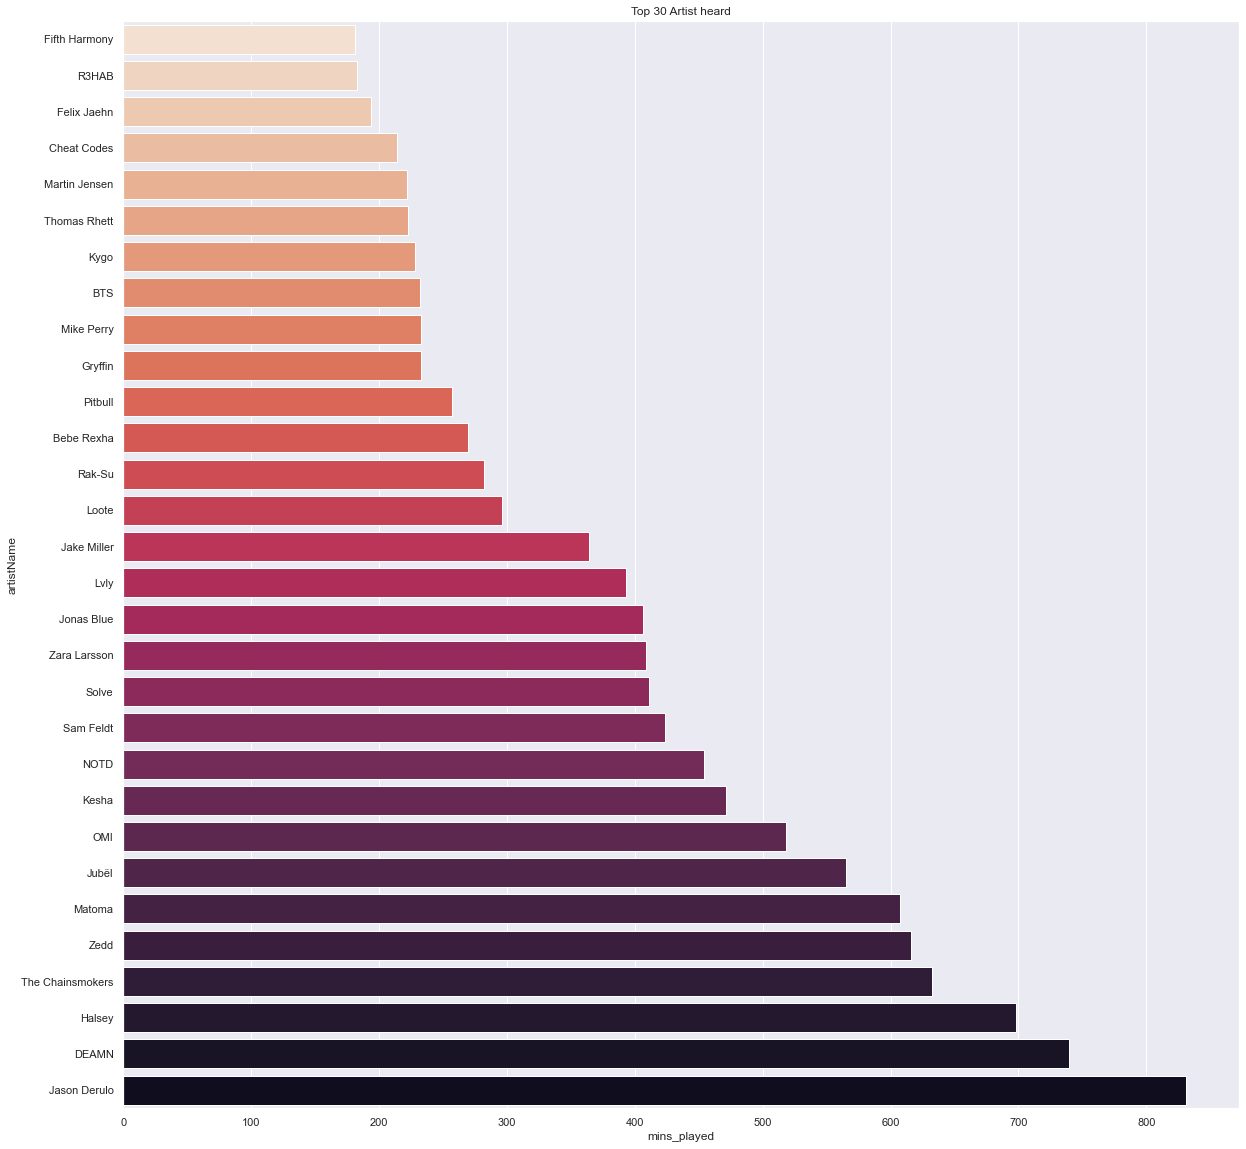

In [15]:
# barplot artist vs minutes_played
plt.rcParams["figure.figsize"] = (20,20)
sns.barplot(y = most_heard_30['artistName'], x = most_heard_30['mins_played'], palette='rocket_r')
plt.title('Top 30 Artist  heard')
plt.show()

In [14]:
#According to the above bar graph Ive listened Jason Derulo (American Sonwriter and singer) 

In [15]:
#Now Lets see my music mood

In [19]:
my_streaming.columns

Index(['artistName', 'trackName', 'msPlayed', 'datetime', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id',
       'time_signature', 'mins_played', 'date'],
      dtype='object')

In [20]:
# create new date series for displaying time series data
idx = pd.DataFrame(pd.date_range(min(my_streaming.date), max(my_streaming.date)),columns=['date'])
idx['date'] = idx.apply(lambda x: pd.to_datetime(x['date'],format='%Y-%m-%d'),axis=1)

In [21]:
valence = my_streaming.groupby('date')['valence'].aggregate(['min', np.mean, 'max'])

In [22]:
val = pd.merge(idx, valence, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)
val.head()

,date,min,mean,max
0,2020-05-12,0.319,0.319,0.319
1,2020-05-13,0.000,0.000,0.000
2,2020-05-14,0.000,0.000,0.000
3,2020-05-15,0.000,0.000,0.000
4,2020-05-16,0.000,0.000,0.000


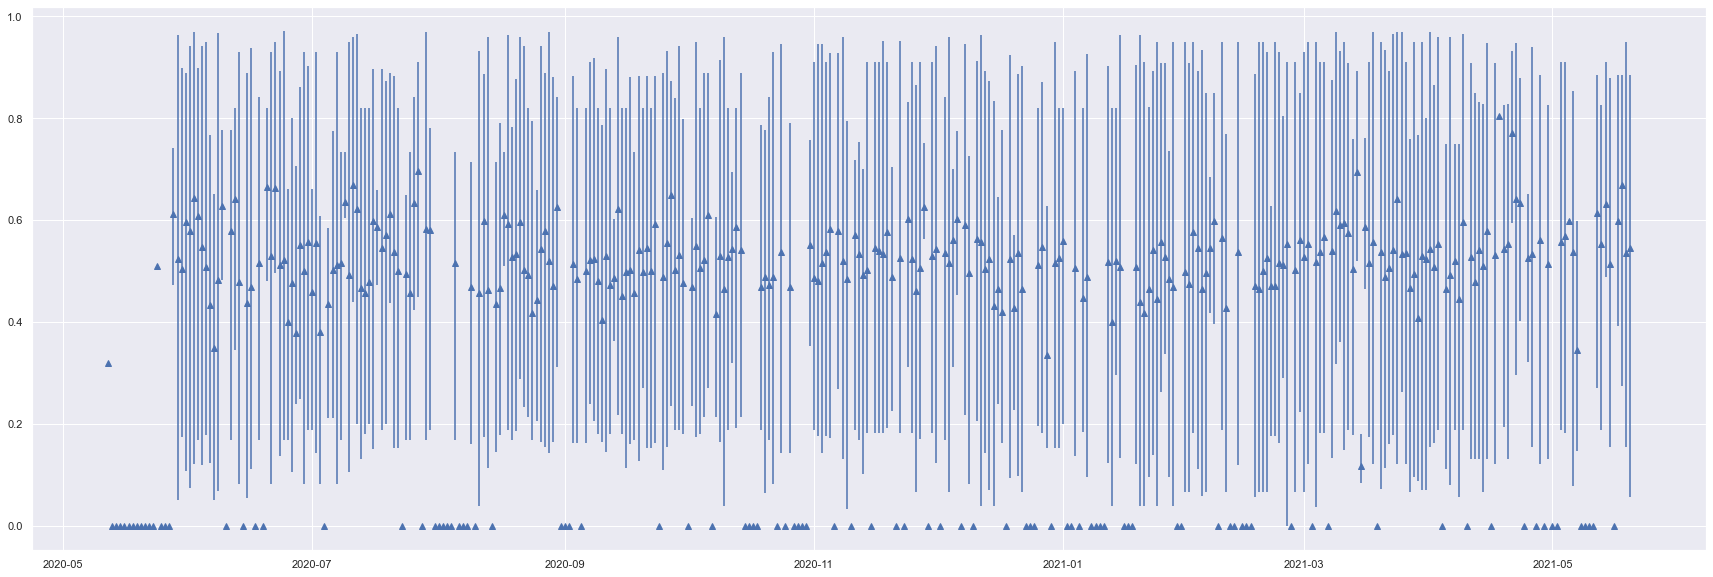

In [23]:
plt.rcParams["figure.figsize"] = (30,10)
plt.errorbar(val["date"],val["mean"], [val["mean"] - val['min'],val['max']-val["mean"]], linestyle='None',marker='^')
plt.show()

In [ ]:
#From above graph you'll come to know that i see all kinda songs whether its a happy or a sad song
# Similarly Lets plot the graph of dance and enrgy 

In [24]:
energy = my_streaming.groupby('date')['energy'].aggregate(['min', np.mean, 'max'])
dance = my_streaming.groupby('date')['danceability'].aggregate(['min', np.mean, 'max'])

In [25]:
d = pd.merge(idx, energy, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)
e = pd.merge(idx, dance, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)

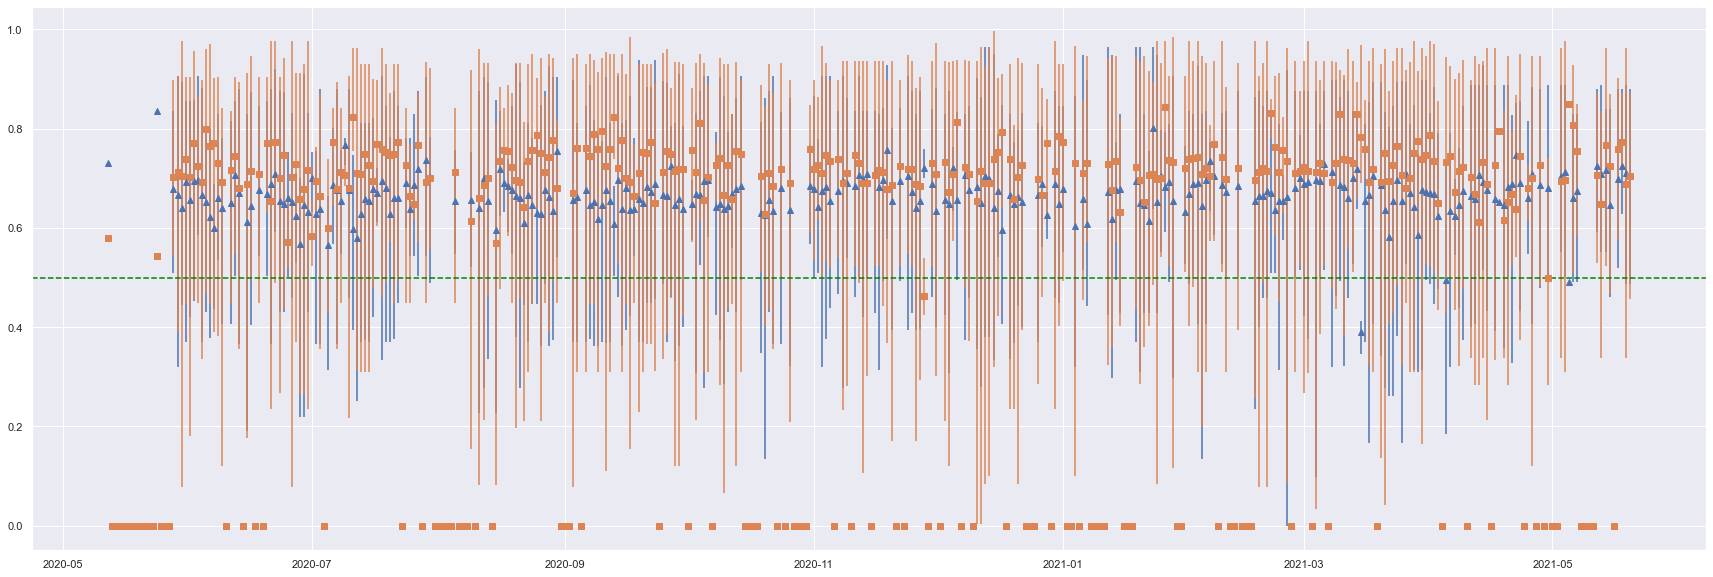

In [26]:
plt.rcParams["figure.figsize"] = (30,10)
plt.errorbar(e["date"],e["mean"], [e["mean"] - e['min'],e['max']-e["mean"]], linestyle='None',marker='^')
plt.errorbar(d["date"],d["mean"], [d["mean"] - d['min'],d['max']-d["mean"]], linestyle='None',marker='s')
plt.axhline(y=0.5, color='green', linestyle='dashed')
plt.show()

In [16]:
#Now we will analyse song features 

In [29]:
distinct_song = pd.read_csv('distinct_song.csv')
distinct_song = distinct_song.drop(columns=['Unnamed: 0'])

In [30]:
features = ['danceability', 'energy', 'key', 'loudness' ,'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']

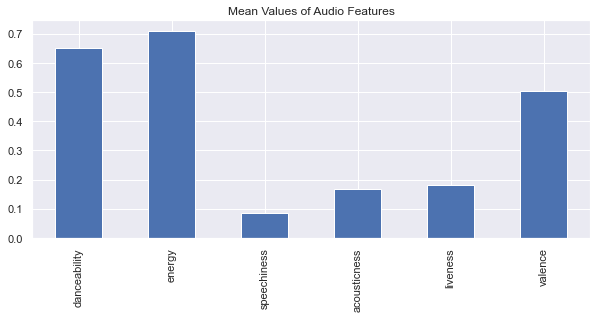

In [31]:
small = distinct_song[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']]
plt.figure(figsize=(10,4))
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

In [17]:
# for col in features:
#   sns.displot(distinct_song, x=col, kde=True)
#   plt.show()

In [18]:
# plt.rcParams['figure.figsize'] = (20,7)
# g = sns.FacetGrid(distinct_song, col='mode')
# g.map(sns.histplot, "tempo")
# plt.show()

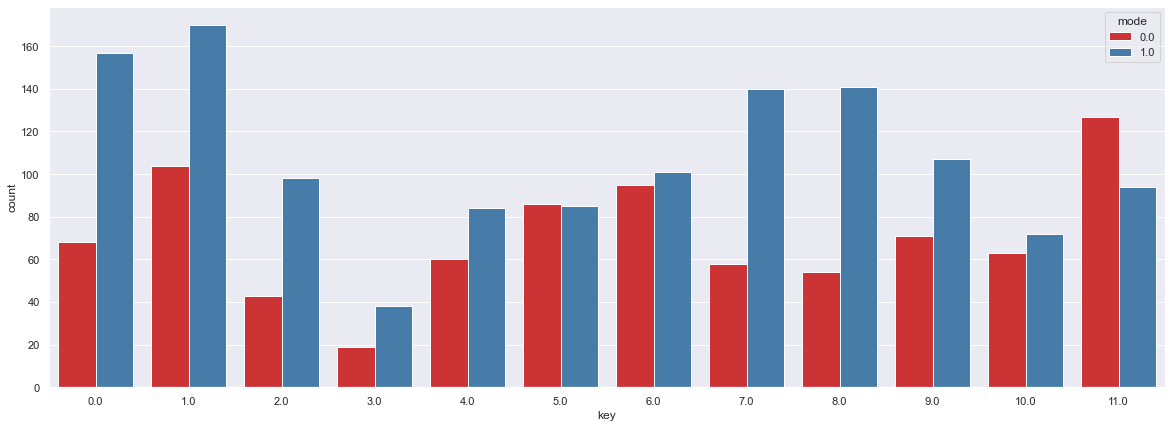

In [35]:
sns.countplot(data=distinct_song, x='key', hue='mode', palette = 'Set1')

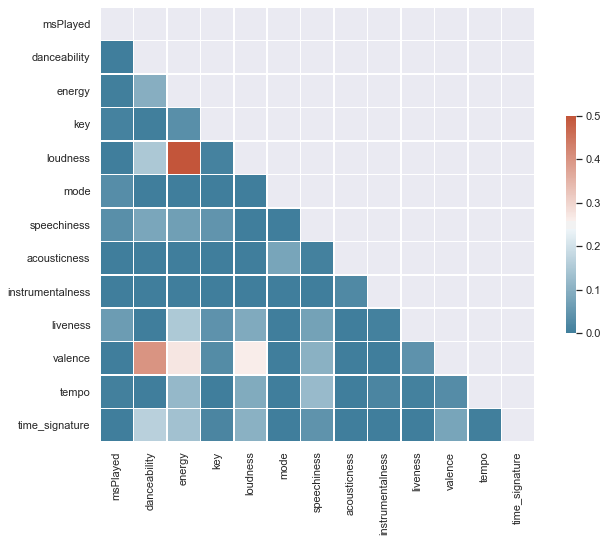

In [36]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(distinct_song.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(distinct_song.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# So from the above heatmap 
# we come to know that there a correlation between
# 1.loudness & energy
# 2.valence & danceability
# 3.valence & energy
# 4.valence & loudness
# 5.energy & time_signature

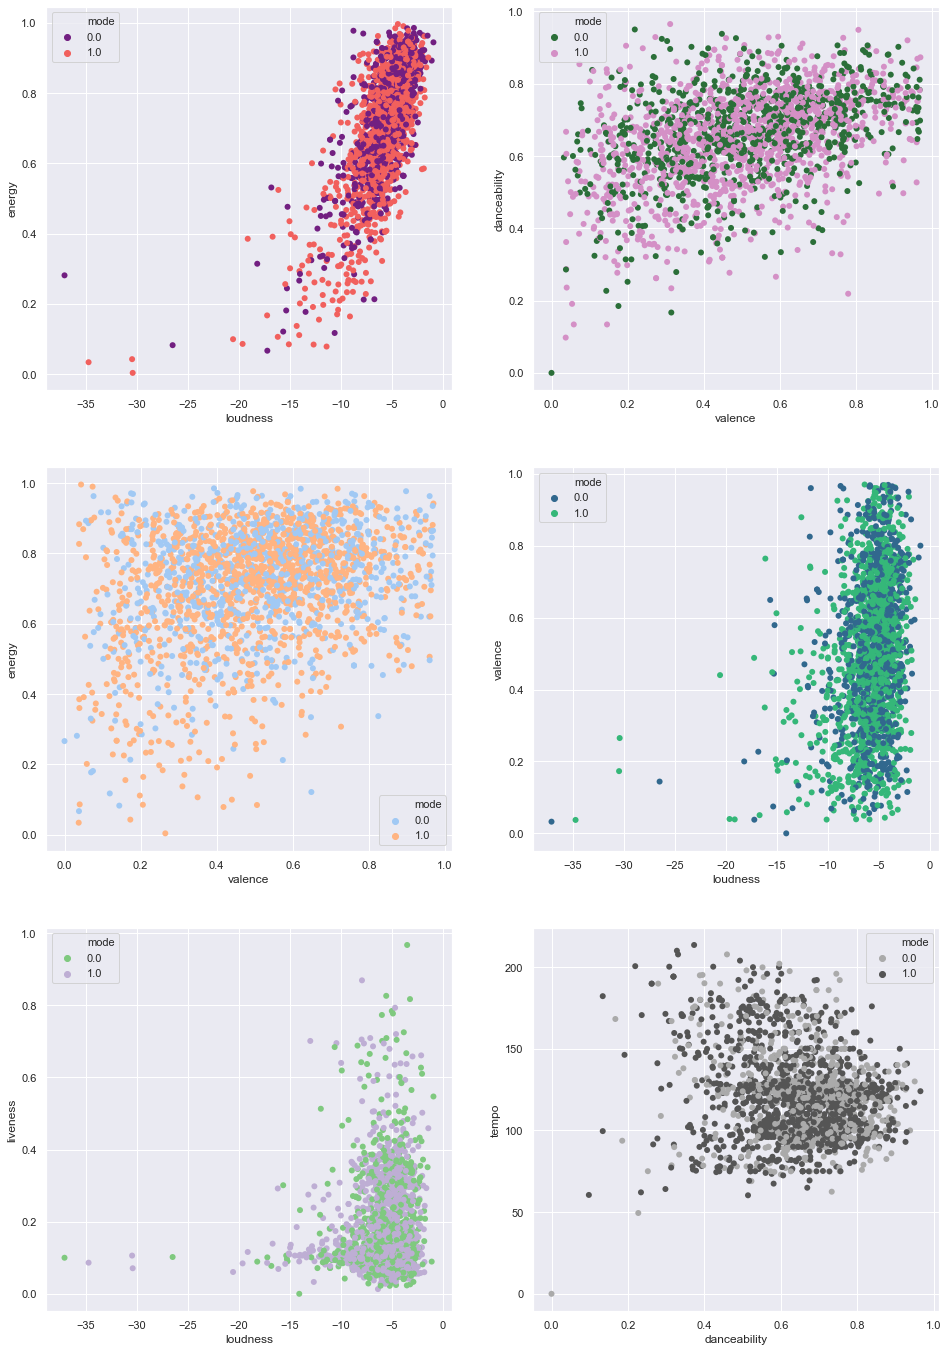

In [37]:
f, ax = plt.subplots(3,2, figsize=(16,24))

sns.scatterplot(x="loudness", y="energy",
                hue="mode", 
                palette="magma",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[0][0])

sns.scatterplot(x="valence", y="danceability",
                hue="mode", 
                palette="cubehelix",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[0][1])

sns.scatterplot(x="valence", y="energy",
                hue="mode", 
                palette="pastel",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[1][0])

sns.scatterplot(x="loudness", y="valence",
                hue="mode", 
                palette="viridis",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[1][1])

sns.scatterplot(x="loudness", y="liveness",
                hue="mode", 
                palette="Accent",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[2][0])

sns.scatterplot(x="danceability", y="tempo",
                hue="mode", 
                palette="binary",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[2][1])

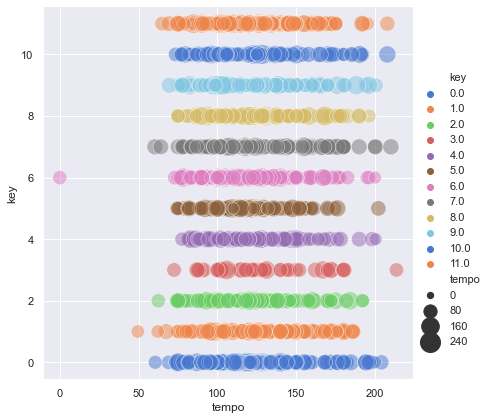

In [38]:
sns.relplot(x="tempo", y="key", hue="key", size=my_streaming['tempo'],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=distinct_song)

In [39]:
table = pd.pivot_table(distinct_song,index=['artistName'], values = ['key'], aggfunc=np.mean)
table

,key
artistName,
$teev,1.0
2 Chainz,1.0
3LAU,4.2
5 Seconds of Summer,6.6
88rising,7.0
...,...
ricky retro,6.0
teamwork.,3.5
traila $ong,1.0


In [19]:
#Now Lets dig in my Playlist

In [40]:
df = pd.read_csv('playlist_data.csv')
df.head(3)

,Unnamed: 0,list_name,song_id,song_name,artist,popularity,release_date,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,mode,key
0,1,Chillax Dance Mix,2mCF8L0brIs88eH6Kf2h9p,Fast Car,Jonas Blue,68.0,2015-12-04,0.570,0.299,113.945,0.0520,0.484,0.000000,0.644,212424.0,-6.994,0.527,1.0,9.0
1,2,Chillax Dance Mix,2tnVG71enUj33Ic2nFN6kZ,Ride It,Regard,86.0,2019-07-26,0.751,0.106,117.948,0.0874,0.177,0.000064,0.880,157606.0,-4.258,0.884,0.0,7.0
2,3,Chillax Dance Mix,2tnVG71enUj33Ic2nFN6kZ,Ride It,Regard,86.0,2019-07-26,0.751,0.106,117.948,0.0874,0.177,0.000064,0.880,157606.0,-4.258,0.884,0.0,7.0


In [20]:
#As there are a lot of Playlists lets compare them

In [41]:
from math import pi

In [42]:
radar = df.groupby('list_name')[['energy', 'danceability', 'valence', 'liveness', 'acousticness']].aggregate(np.mean)
radar.head(3)

,energy,danceability,valence,liveness,acousticness
list_name,,,,,
Adventure,0.793200,0.630600,0.525400,0.172340,0.120258
Beats/EDM,0.742615,0.705330,0.529273,0.192499,0.097811
Chillax Dance Mix,0.707769,0.748769,0.595269,0.157681,0.180269


In [43]:
playlist_names = radar.index.to_list()
playlist_names

['Adventure',
 'Beats/EDM',
 'Chillax Dance Mix',
 'Cringe',
 'Cyrus ne suggest kia',
 'HIIT',
 'Halsey inducing palsey',
 'Hip-hop/Rap',
 'Jason derulo',
 'Motivation Mix',
 'Random',
 'Yash ke gaane']

In [44]:
def plot_radar(idx,color):
  # categories
  category = ['energy', 'danceability', 'valence', 'liveness', 'acousticness']
  N = len(category)

  #values
  values = radar.iloc[idx].to_list()
  values += values[:1]

  # calculate angle for each category
  angles = [n / float(N) * 2 * pi for n in range(N) ]
  angles += angles[:1]

  # plot
  plt.polar(angles, values, marker = '.', color=color)
  plt.fill(angles, values, alpha=0.3, color=color)

  # x labels
  plt.xticks(angles[:-1], category)

  # y labels
  plt.yticks([0.2,0.4,0.6,0.8])
  plt.ylim(0,1)

In [45]:
color = ['crimson', 'teal', 'yellowgreen', 'gold', 'maroon', 'gray', 'lime', 'slateblue', 'chocolate', 'darkcyan']

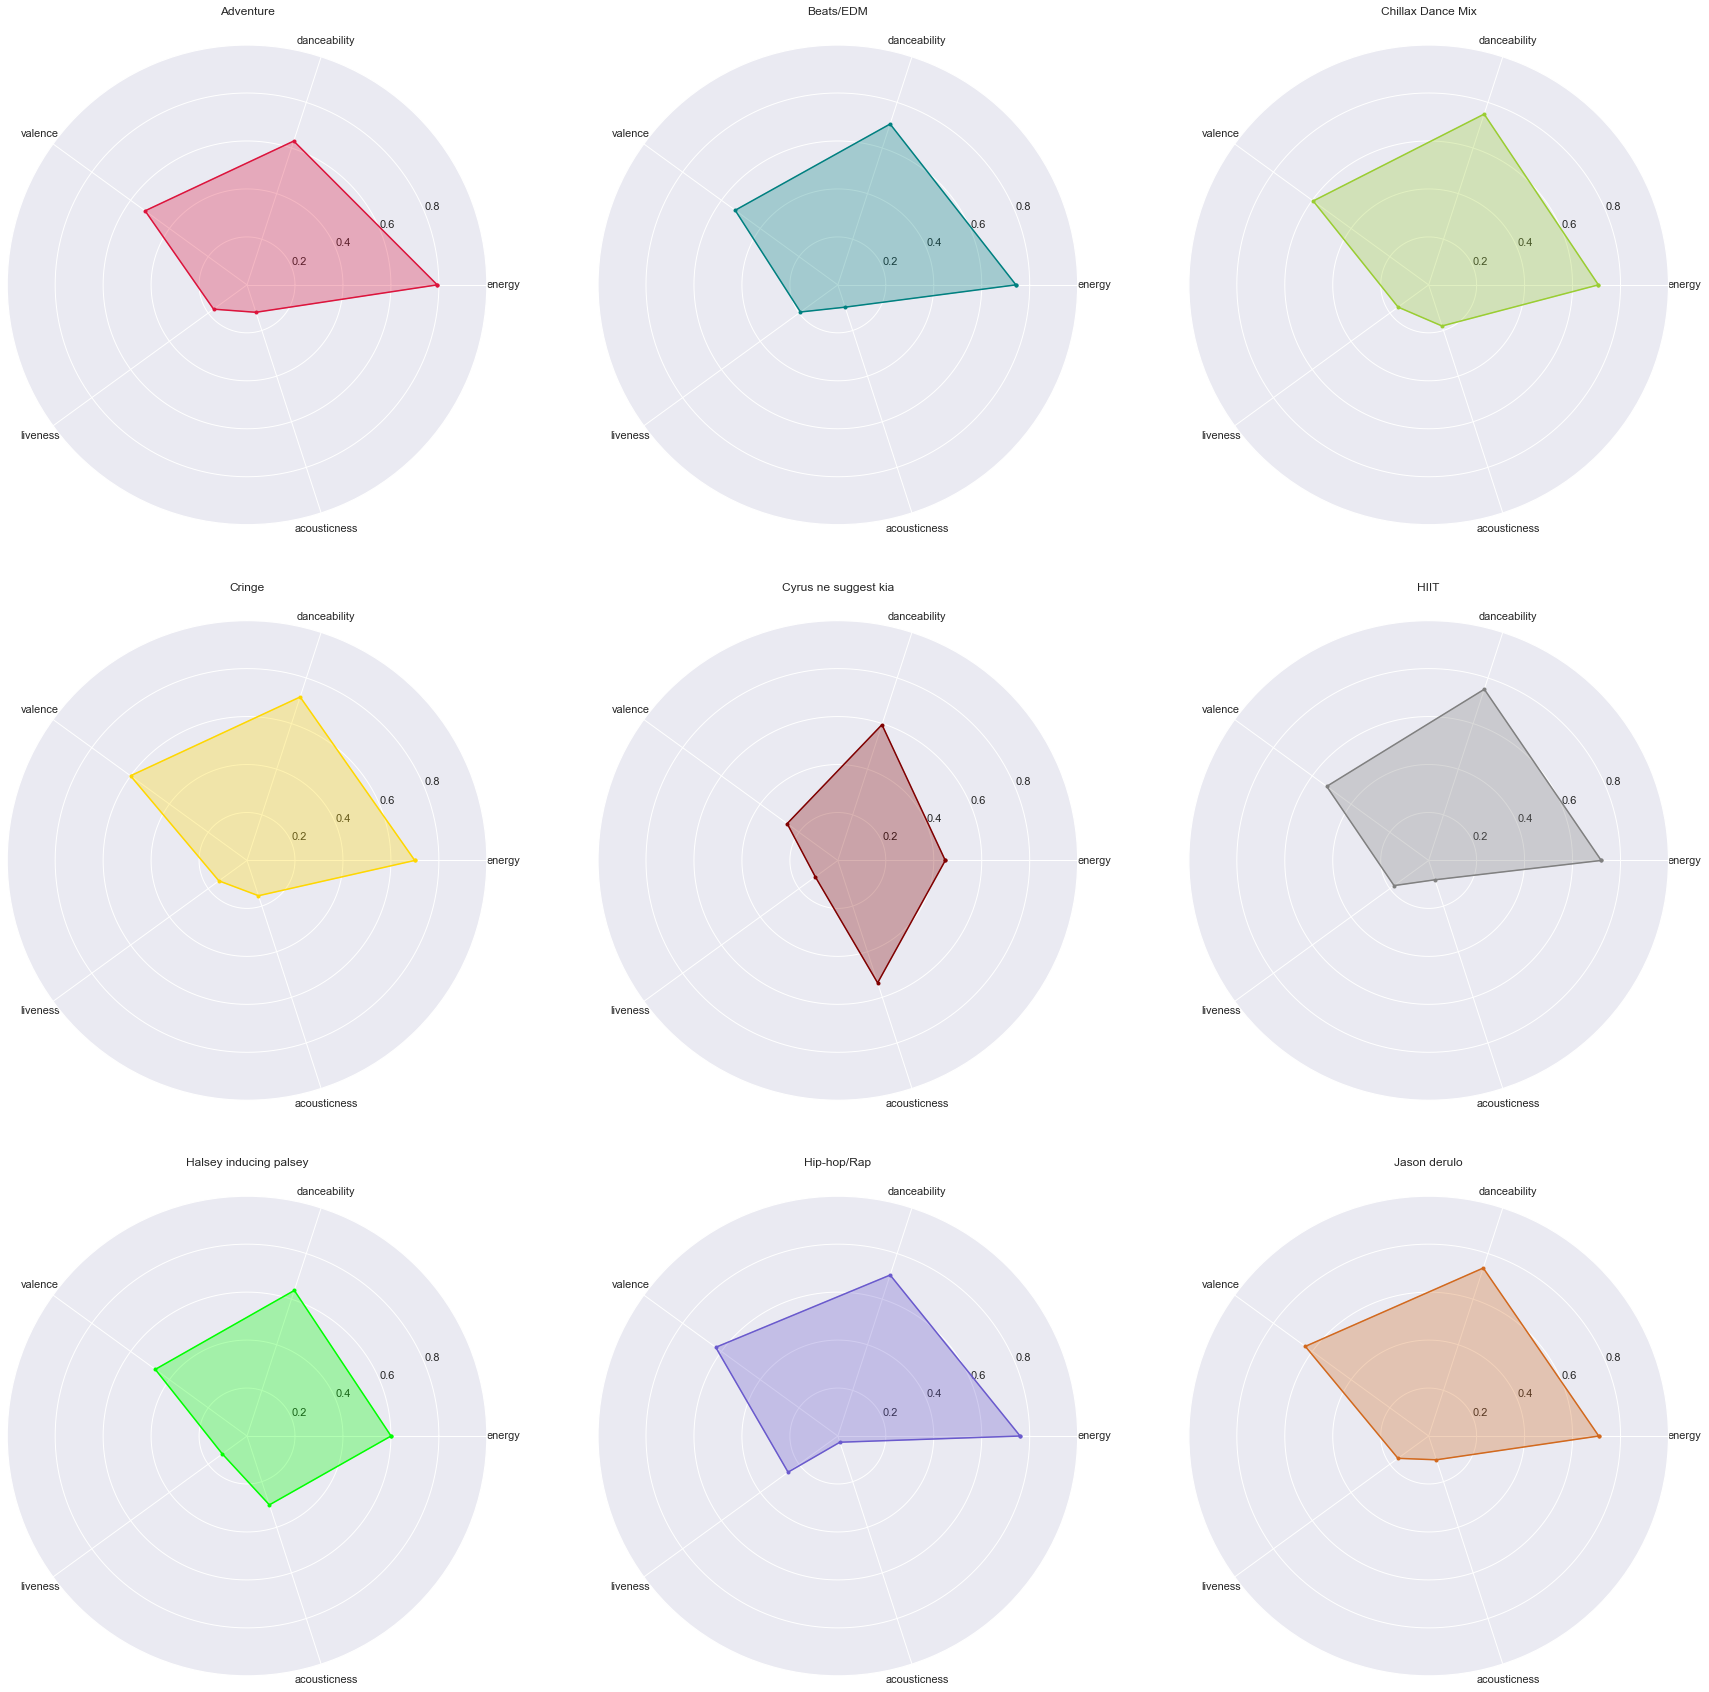

In [46]:
plt.rcParams['figure.figsize'] = (30,30)
for i in range(9):
  k = i+1
  ax = plt.subplot(int('33' + str(k)), polar='True')
  ax.title.set_text(playlist_names[i])
  plot_radar(i,color[i])

plt.show()

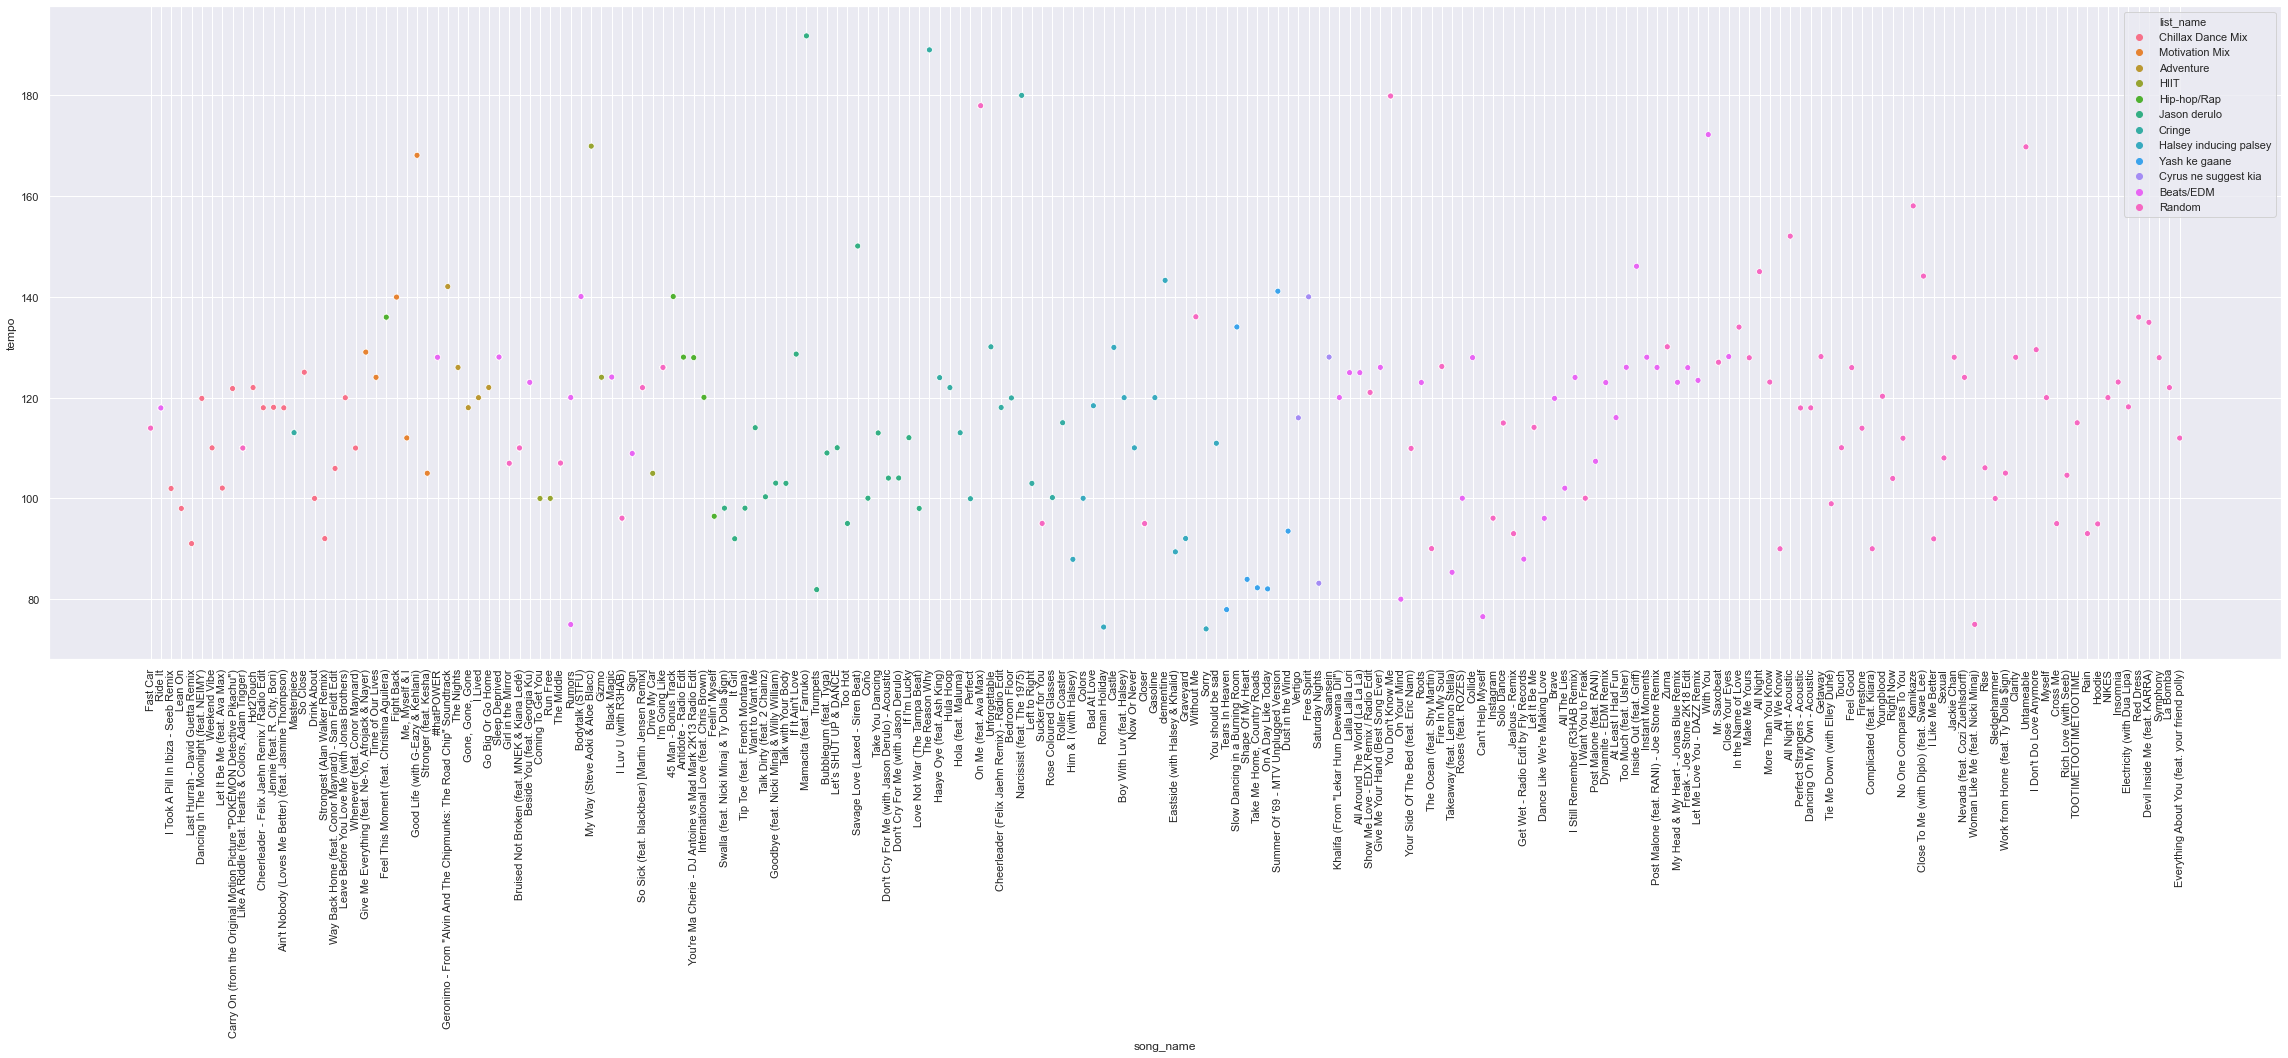

In [47]:
plt.rcParams['figure.figsize'] = (40,12)
sns.scatterplot(data=df, x='song_name', y='tempo', hue='list_name')
plt.xticks(rotation=90)
plt.show()

In [21]:
# Now lets see which songs i listen whether their the old ones or the new ones

In [48]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].apply(lambda x: x.year)

In [49]:
idx = pd.DataFrame(range(1971,2020),columns=['Release Year'])

# then merge the idx with df"release_year" that is just created
release_year = pd.merge(idx, df[['song_id', 'year']], how='left',left_on='Release Year',right_on = 'year', copy=False)

release_year.drop("year",inplace=True,axis=1)
release_year.head(3)

,Release Year,song_id
0,1971,1YYhDizHx7PnDhAhko6cDS
1,1972,NaN
2,1973,NaN


In [51]:
release_year = release_year.groupby('Release Year', as_index=False)['song_id'].count()
release_year.head(10)

,Release Year,song_id
0,1971,1
1,1972,0
2,1973,0
3,1974,0
4,1975,0
5,1976,0
6,1977,1
7,1978,0
8,1979,0
9,1980,0


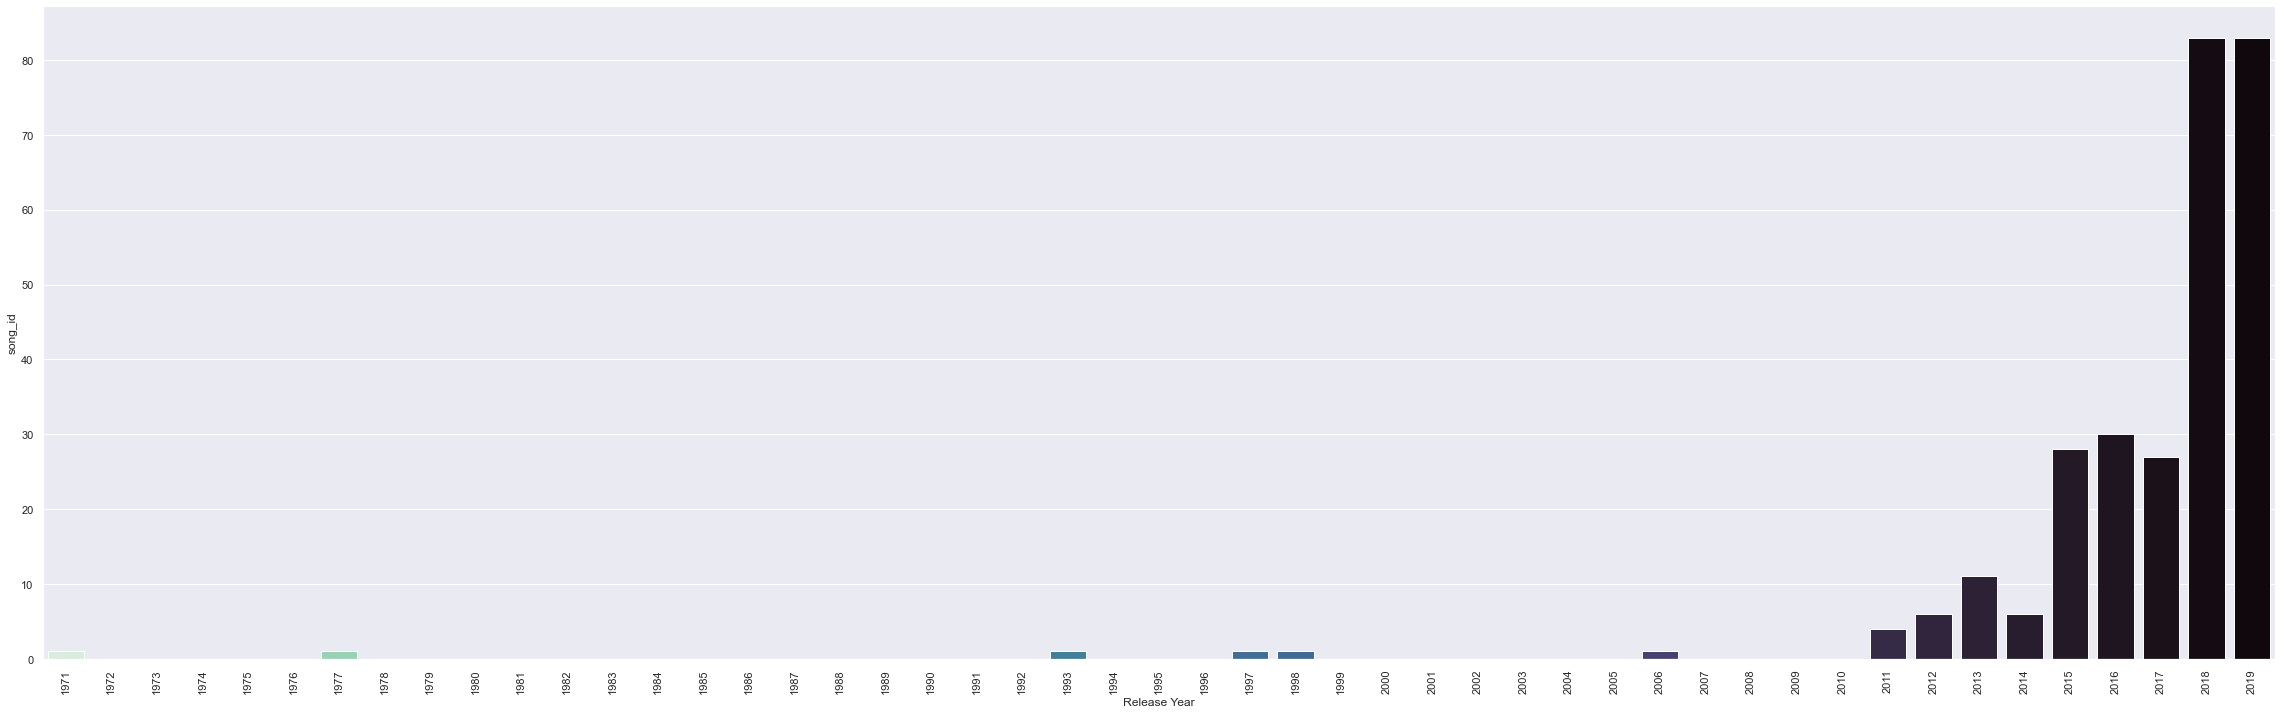

In [52]:
sns.barplot(data=release_year, x='Release Year', y='song_id', palette='mako_r')
plt.xticks(rotation=90)
plt.show()

In [23]:
#Oh so i see the recently relased songs 

In [24]:
#Count of Songs for each mode

In [53]:
key_mode = df.groupby(["key","mode"], as_index=False)["song_id"].count()
key_mode.head(3)

,key,mode,song_id
0,0.0,0.0,5
1,0.0,1.0,20
2,1.0,0.0,14


In [54]:
# map the key in number to the real key represented in alphabet
key_dic = {0: "C", 
           1: "C♯/D♭",
           2: "D",
           3: "D♯/E♭",
           4: "E",
           5: "F",
           6: "F♯/G♭",
           7: "G",
           8: "G♯/A♭",
           9: "A",
           10: "A♯/B♭",
           11: "B"}
key_mode = key_mode.replace({"key": key_dic})

C:\Users\Shardha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shardha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9837 missing from current font.
  font.set_text(s, 0, flags=flags)


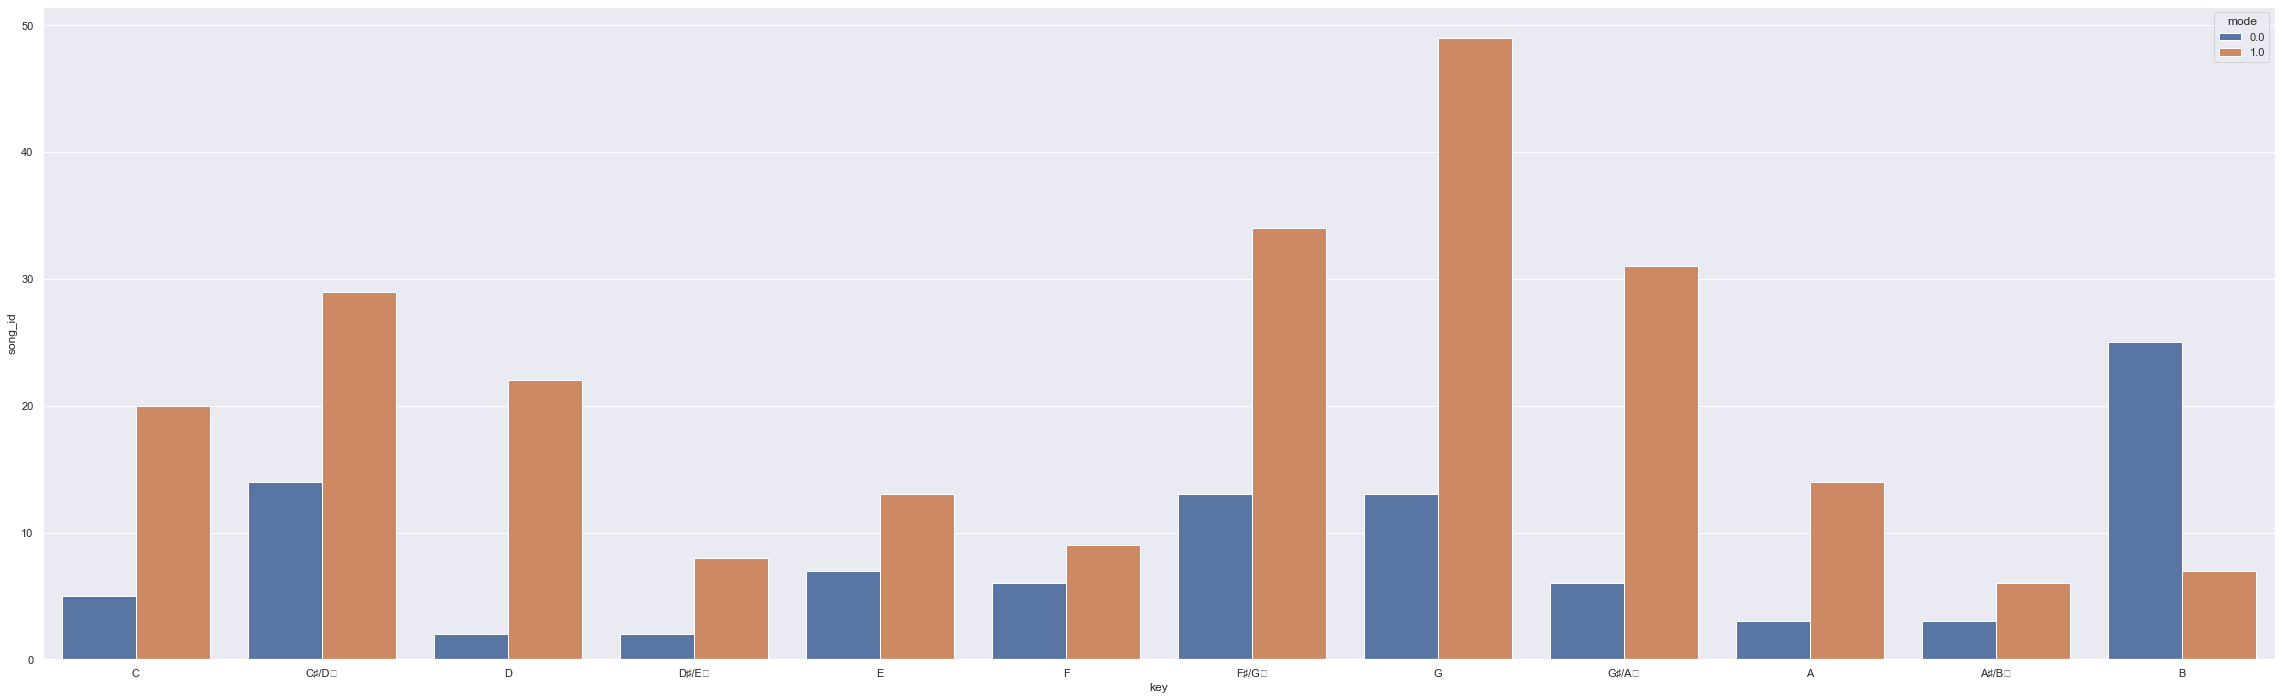

In [55]:
sns.barplot(data=key_mode, x='key', y='song_id', hue='mode')
plt.show()